In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
import requests
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
dataset = pd.read_csv(r"C:\Users\asus\Desktop\models\Spotify_Song_Attributes_with_clusters.csv", encoding='ISO-8859-1')

In [3]:
#data preprocessing
duplicate_rows = dataset[dataset.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")
# Display the duplicate rows
print(duplicate_rows)
# Remove duplicate rows from the dataset
dataset = dataset.drop_duplicates()
null_values = dataset.isnull().sum()    
print(null_values)##no null values
# Drop rows with any null values
dataset_cleaned = dataset.dropna()
print(f"Number of rows after dropping nulls: {dataset_cleaned.shape[0]}")


Number of duplicate rows: 0
Empty DataFrame
Columns: [trackName, artistName, msPlayed, genre, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, type, id, uri, track_href, analysis_url, duration_ms, time_signature, hierarchical_cluster, audio_cluster, combined_cluster]
Index: []

[0 rows x 25 columns]
trackName                 0
artistName                0
msPlayed                399
genre                     0
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
type                    399
id                      399
uri                     399
track_href              399
analysis_url            399
duration_ms               0
time_signature            0
hierarchical_clust

In [4]:
# One-hot encode the artistName
#label_encoder = LabelEncoder()

# Apply label encoding to 'artistName' and add it as a new column
#dataset['artistName_encoded'] = label_encoder.fit_transform(dataset['artistName'])

features = [
    'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]



In [5]:

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
genre_one_hot = encoder.fit_transform(dataset[['genre']])
# Convert NumPy array to pandas DataFrame
genre_one_hot_df = pd.DataFrame(genre_one_hot, columns=encoder.get_feature_names_out(['genre']))

# Save as CSV
genre_one_hot_df.to_csv("genre_one_hot.csv", index=False)



In [6]:
dataset.head(10)

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,hierarchical_cluster,audio_cluster,combined_cluster
0,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234.0,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,...,audio_features,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827.0,4.0,0,3,0_3
1,#BrooklynBloodPop!,SyKo,145610.0,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,...,audio_features,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0,0,1,0_1
2,$10,Good Morning,25058.0,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,audio_features,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0,0,3,0_3
3,(I Just) Died In Your Arms,Cutting Crew,5504949.0,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,audio_features,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0,0,3,0_3
4,(L)only Child,salem ilese,2237969.0,alt z,0.645,0.611,8.0,-5.925,0.0,0.1370,...,audio_features,22lJaG2yxlSjIwdUIddcFk,spotify:track:22lJaG2yxlSjIwdUIddcFk,https://api.spotify.com/v1/tracks/22lJaG2yxlSj...,https://api.spotify.com/v1/audio-analysis/22lJ...,144468.0,3.0,11,2,11_2
5,(lol),Eren Cannata,441335.0,guitar case,0.663,0.904,7.0,-4.710,1.0,0.0857,...,audio_features,4DS2UXeR2V5W7R9aype6t1,spotify:track:4DS2UXeR2V5W7R9aype6t1,https://api.spotify.com/v1/tracks/4DS2UXeR2V5W...,https://api.spotify.com/v1/audio-analysis/4DS2...,217627.0,4.0,0,3,0_3
6,"...And to Those I Love, Thanks for Sticking Ar...",$uicideboy$,120005.0,cloud rap,0.792,0.511,2.0,-6.876,1.0,0.0409,...,audio_features,30QR0ndUdiiMQMA9g1PGCm,spotify:track:30QR0ndUdiiMQMA9g1PGCm,https://api.spotify.com/v1/tracks/30QR0ndUdiiM...,https://api.spotify.com/v1/audio-analysis/30QR...,168490.0,4.0,21,3,21_3
7,...Baby One More Time,Britney Spears,107407.0,dance pop,0.759,0.699,0.0,-5.745,0.0,0.0307,...,audio_features,3MjUtNVVq3C8Fn0MP3zhXa,spotify:track:3MjUtNVVq3C8Fn0MP3zhXa,https://api.spotify.com/v1/tracks/3MjUtNVVq3C8...,https://api.spotify.com/v1/audio-analysis/3MjU...,211067.0,4.0,4,0,4_0
8,0 to 100,Sidhu Moose Wala,21354.0,desi hip hop,0.742,0.675,8.0,-6.551,1.0,0.0907,...,audio_features,7cVe3mYMIfhOlz1NXFWv70,spotify:track:7cVe3mYMIfhOlz1NXFWv70,https://api.spotify.com/v1/tracks/7cVe3mYMIfhO...,https://api.spotify.com/v1/audio-analysis/7cVe...,108493.0,4.0,0,1,0_1
9,01:22,colours in the dark,516640.0,lo-fi sleep,0.620,0.122,2.0,-19.470,0.0,0.0428,...,audio_features,3mZxGT3FA0vICzX4owzYGq,spotify:track:3mZxGT3FA0vICzX4owzYGq,https://api.spotify.com/v1/tracks/3mZxGT3FA0vI...,https://api.spotify.com/v1/audio-analysis/3mZx...,129160.0,3.0,0,0,0_0


Elbow Method for Audio Features:


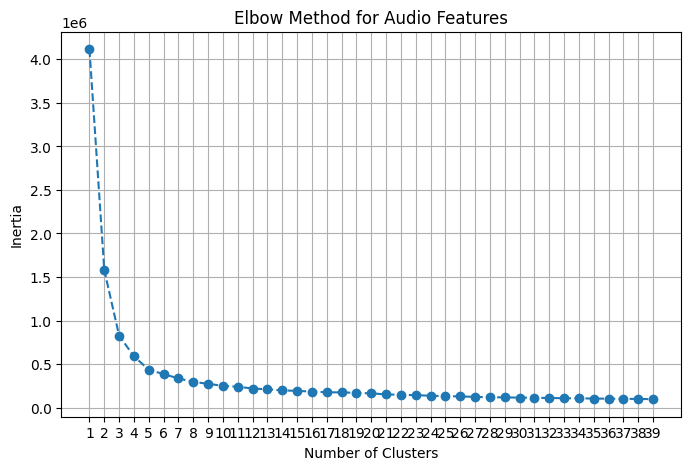

<Figure size 640x480 with 0 Axes>

In [7]:
# Elbow Method to determine the optimal number of clusters for KMeans
def elbow_method(data, cluster_range=range(1, 40), title="Elbow Method"):
    inertia = []  # Correct initialization of inertia list
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)  # Append inertia correctly in each loop

    # Plot the elbow curve
    plt.figure(figsize=(8, 5))
    plt.plot(cluster_range, inertia, marker='o', linestyle='--')
    plt.title(title)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.xticks(cluster_range)
    plt.grid()
    plt.show()
    plt.savefig('chart1.png')

# Apply the elbow method on audio features
print("Elbow Method for Audio Features:")
elbow_method(dataset[features], title="Elbow Method for Audio Features")
##genre_encoded_reshaped = dataset[['genre']]  # Use double brackets to create a DataFrame
# Apply the elbow method on genre features
#print("Elbow Method for Genre Features:")
#elbow_method(genre_encoded_reshaped, title="Elbow Method for Genre Features")

#changed the aprouch from kmeans to hierichical so the elbow method isnt neccessry for genre


In [43]:

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import OneHotEncoder
import joblib


hierarchical = AgglomerativeClustering(n_clusters=None, distance_threshold=9)
dataset['hierarchical_cluster'] = hierarchical.fit_predict(genre_one_hot )
joblib.dump(hierarchical, "hierarchical_model.pkl")  # Save the model

# Number of clusters formed
n_clusters = dataset['hierarchical_cluster'].nunique()
print(f"Number of clusters formed: {n_clusters}")

# Ensure the number of clusters is valid for scoring
if 2 <= n_clusters < len(dataset):
    # Calculate evaluation metrics
    silhouette = silhouette_score(genre_one_hot , dataset['hierarchical_cluster'])
    davies_bouldin = davies_bouldin_score(genre_one_hot , dataset['hierarchical_cluster'])
    calinski_harabasz = calinski_harabasz_score(genre_one_hot , dataset['hierarchical_cluster'])

    print("Silhouette Score for Genre Hierarchical Clustering:", silhouette)
    print("Davies-Bouldin Index for Genre Hierarchical Clustering:", davies_bouldin)
    print("Calinski-Harabasz Index for Genre Hierarchical Clustering:", calinski_harabasz)
else:
    print(f"Invalid number of clusters ({n_clusters}) for scoring.")


Number of clusters formed: 26
Silhouette Score for Genre Hierarchical Clustering: 0.46169790113363235
Davies-Bouldin Index for Genre Hierarchical Clustering: 0.9941369726487861
Calinski-Harabasz Index for Genre Hierarchical Clustering: 153.92529706670766


In [44]:

# KMeans Clustering on Audio Features (using 5 clusters as an example)
kmeans_audio = KMeans(n_clusters=4,init="k-means++", random_state=42)
dataset['audio_cluster'] = kmeans_audio.fit_predict(dataset[features])
joblib.dump(kmeans_audio, "kmeans_audio_model.pkl") 

silhouette = silhouette_score(dataset[features], kmeans_audio.labels_)
davies_bouldin = davies_bouldin_score(dataset[features], kmeans_audio.labels_)
calinski_harabasz = calinski_harabasz_score(dataset[features], kmeans_audio.labels_)


# Save the KMeans model

# Print the results
print("Davies-Bouldin Index for audio features:", davies_bouldin)  # Lower is better
print("Calinski-Harabasz Index for audio features:", calinski_harabasz)  # Higher is better
print("Silhouette Score for audio features:", silhouette)
dataset.head()


Davies-Bouldin Index for audio features: 0.6888877175471778
Calinski-Harabasz Index for audio features: 9375.547207370364
Silhouette Score for audio features: 0.4407436237318519


,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,hierarchical_cluster,audio_cluster,combined_cluster
0,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234.0,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,...,audio_features,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827.0,4.0,0,3,0_3
1,#BrooklynBloodPop!,SyKo,145610.0,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,...,audio_features,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0,0,1,0_1
2,$10,Good Morning,25058.0,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,audio_features,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0,0,3,0_3
3,(I Just) Died In Your Arms,Cutting Crew,5504949.0,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,audio_features,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0,0,3,0_3
4,(L)only Child,salem ilese,2237969.0,alt z,0.645,0.611,8.0,-5.925,0.0,0.1370,...,audio_features,22lJaG2yxlSjIwdUIddcFk,spotify:track:22lJaG2yxlSjIwdUIddcFk,https://api.spotify.com/v1/tracks/22lJaG2yxlSj...,https://api.spotify.com/v1/audio-analysis/22lJ...,144468.0,3.0,11,2,11_2


In [45]:
scaler_genre = StandardScaler()
scaled_genre = scaler_genre.fit_transform(genre_one_hot)

scaler_audio = StandardScaler()
scaled_audio = scaler_audio.fit_transform(dataset[features])

# Weight genre features by a factor (e.g., 1.5x more influence)
weighted_genre = scaled_genre * 1.5

# Combine the weighted genre features and audio features
combined_features = np.hstack((weighted_genre, scaled_audio))

Number of combined clusters formed: 104


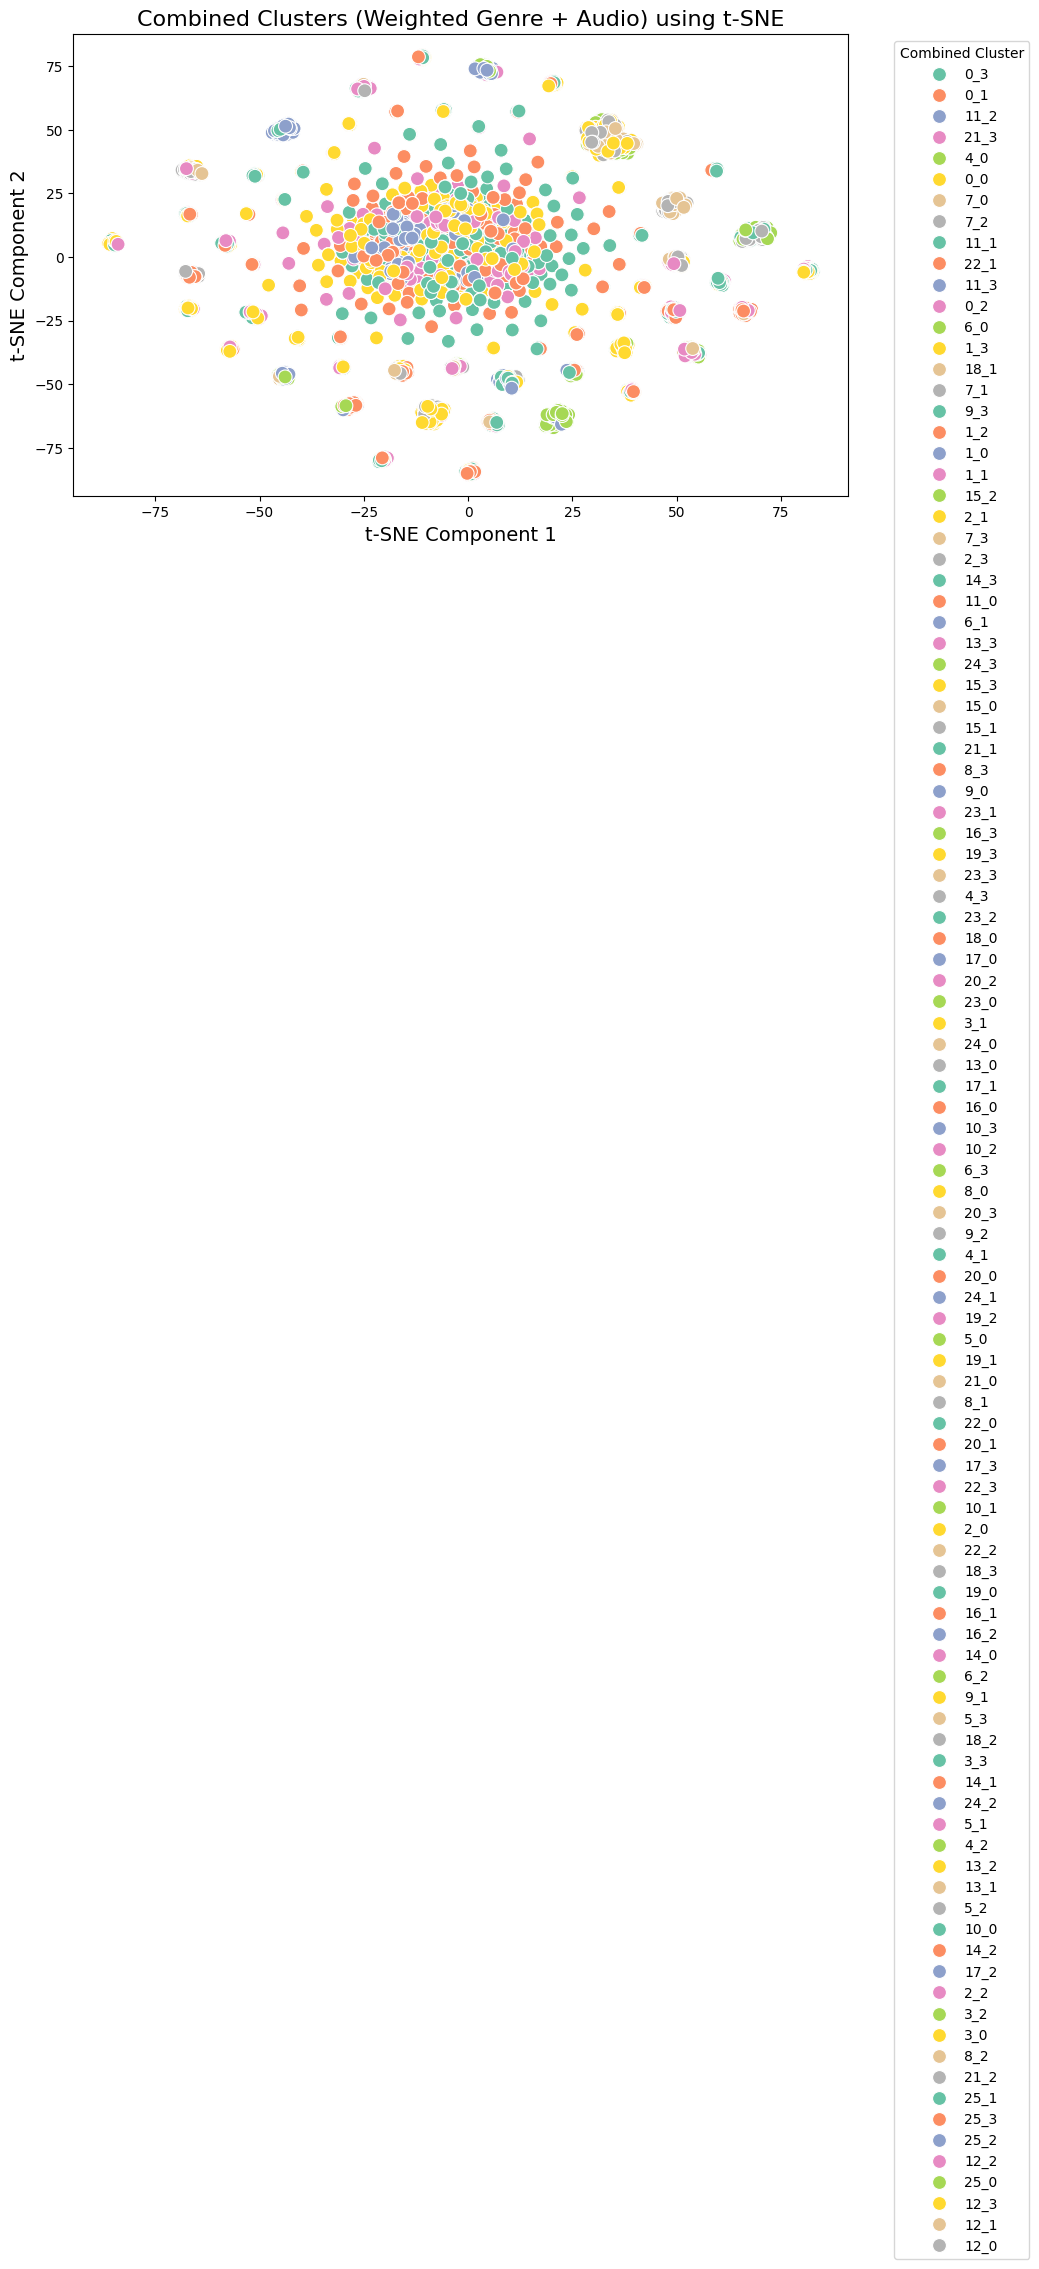

In [46]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Combine both hierarchical and audio clusters into a new combined label
dataset['combined_cluster'] = dataset['hierarchical_cluster'].astype(str) + '_' + dataset['audio_cluster'].astype(str)
dataset.to_csv('Spotify_Song_Attributes_with_clusters.csv', index=False)

# Check the new combined clusters
n_combined_clusters = dataset['combined_cluster'].nunique()
print(f"Number of combined clusters formed: {n_combined_clusters}")

# Use the combined features (weighted genre + audio) for t-SNE
tsne = TSNE(n_components=2, random_state=42)
reduced_features = tsne.fit_transform(combined_features)  # Use combined_features here

# Create a new DataFrame with the t-SNE components and the combined cluster label for seaborn plotting
tsne_df = pd.DataFrame(reduced_features, columns=['tSNE Component 1', 'tSNE Component 2'])
tsne_df['combined_cluster'] = dataset['combined_cluster']

# Plot the t-SNE results using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='tSNE Component 1', y='tSNE Component 2', hue='combined_cluster', palette='Set2', s=100, marker='o')

# Customize the plot
plt.title("Combined Clusters (Weighted Genre + Audio) using t-SNE", fontsize=16)
plt.xlabel("t-SNE Component 1", fontsize=14)
plt.ylabel("t-SNE Component 2", fontsize=14)
plt.legend(title='Combined Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [47]:
# Save combined features and NearestNeighbors model
np.save(r"C:\Users\asus\Desktop\models\combined_features.npy", combined_features)
nn_combined = NearestNeighbors(metric="cosine")
nn_combined.fit(combined_features)
joblib.dump(nn_combined, r"C:\Users\asus\Desktop\models\nn_combined_model.pkl")


['C:\\Users\\asus\\Desktop\\models\\nn_combined_model.pkl']

In [48]:
from sklearn.neighbors import NearestNeighbors

def get_recommendations(song_name, dataset, combined_features, n_recommendations=15):
    """
    Generate recommendations based on combined clustering (weighted genre + audio features),
    ensuring the same song and duplicates are removed.

    Parameters:
    - song_name: Name of the song to base recommendations on.
    - dataset: The dataset containing song information.
    - combined_features: Combined weighted genre and audio features used for clustering.
    - n_recommendations: Number of recommendations for each type (default is 15).
    """

    # Find the song index based on the song name
    song_index = dataset[dataset['trackName'] == song_name].index

    # Ensure the song exists in the dataset
    if len(song_index) == 0:
        print(f"Song '{song_name}' not found in the dataset.")
        return

    song_index = song_index[0]

    # Extract the combined cluster for the input song (using the combined cluster)
    combined_cluster = dataset.loc[song_index, 'combined_cluster']

    # Get songs in the same combined cluster
    combined_cluster_songs = dataset[dataset['combined_cluster'] == combined_cluster]

    # Ensure there are enough songs in the cluster for recommendations
    if len(combined_cluster_songs) < n_recommendations + 1:
        print(f"Not enough songs in the combined cluster ({combined_cluster}) to generate {n_recommendations} recommendations.")
        n_recommendations = len(combined_cluster_songs) - 1  # Set to the max available songs - 1 (exclude the input song)

    # Remove duplicate songs based on trackName and artistName
    combined_cluster_songs = combined_cluster_songs.drop_duplicates(subset=['trackName', 'artistName'])

    # Nearest Neighbors for combined cluster (based on the combined features)
    nn_combined = NearestNeighbors(n_neighbors=n_recommendations + 1, metric='cosine')  # n_neighbors + 1 for the input song
    nn_combined.fit(combined_features[combined_cluster_songs.index])  # Fit using combined features
    combined_distances, combined_indices = nn_combined.kneighbors(combined_features[song_index].reshape(1, -1))

    # Get the combined cluster-based recommendations
    recommendations_indices = combined_indices[0][1:]  # Skip the first result (the input song itself)
    combined_recommendations = combined_cluster_songs.iloc[recommendations_indices]

    # Remove the input song from the recommendations
    combined_recommendations = combined_recommendations[combined_recommendations.index != song_index]

    # Display the recommendations
    print(f"\nRecommendations for '{song_name}':")

    for idx, song in combined_recommendations.iterrows():
        print(f"- {song['trackName']} by {song['artistName']} (Combined Cluster: {song['combined_cluster']})")

# Example usage with the new combined features
get_recommendations(song_name="A BOY IS A GUN*", dataset=dataset, combined_features=combined_features, n_recommendations=15)



Recommendations for 'A BOY IS A GUN*':
- She by Tyler, The Creator, Frank Ocean (Combined Cluster: 3_0)
- Scared of the Dark (feat. XXXTENTACION) by Lil Wayne (Combined Cluster: 3_0)
- Lie by NF (Combined Cluster: 3_0)
- Like This by NF (Combined Cluster: 3_0)
- Returns by NF (Combined Cluster: 3_0)
- Congratulations (feat. Bilal) by Mac Miller, Bilal (Combined Cluster: 3_0)
- EARFQUAKE by Tyler, The Creator (Combined Cluster: 3_0)
- God Is Fair, Sexy Nasty (feat. Kendrick Lamar) by Mac Miller, Kendrick Lamar (Combined Cluster: 3_0)
- Time by NF (Combined Cluster: 3_0)
- THE PLAN by Travis Scott (Combined Cluster: 3_0)
- The Plan - From the Motion Picture "TENET" by Travis Scott (Combined Cluster: 3_0)
- 16 by Baby Keem (Combined Cluster: 3_0)
- Nate by NF (Combined Cluster: 3_0)
- hooligan by Baby Keem (Combined Cluster: 3_0)
- Unforgettable by French Montana (Combined Cluster: 3_0)


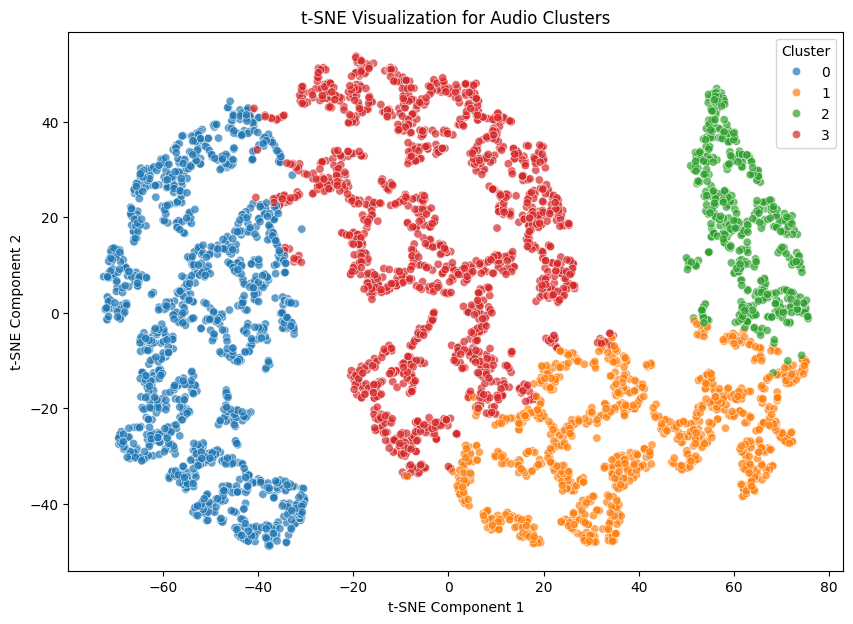

In [49]:
from sklearn.manifold import TSNE
import seaborn as sns


# T-SNE for audio clusters
tsne_audio = TSNE(n_components=2, random_state=42)
audio_tsne = tsne_audio.fit_transform(dataset[features])

# Plotting function
def plot_tsne(tsne_data, cluster_column, title):
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=dataset[cluster_column], palette='tab10', alpha=0.7)
    plt.title(title)
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.legend(title="Cluster")
    plt.show()

# Plot T-SNE results
plot_tsne(audio_tsne, cluster_column='audio_cluster', title="t-SNE Visualization for Audio Clusters")



Shape of genre_encoded_scaled: (4689, 540)


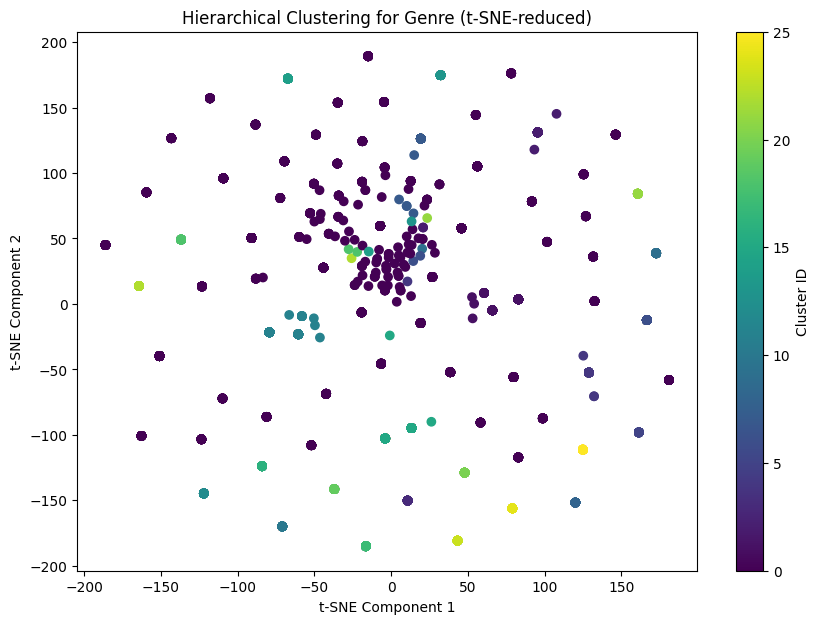

In [50]:
from sklearn.manifold import TSNE
print("Shape of genre_encoded_scaled:", genre_one_hot.shape)

# Reduce to 2D using t-SNE
tsne = TSNE(n_components=2)
genre_tsne = tsne.fit_transform(genre_one_hot)

# Plot the t-SNE reduced data
plt.figure(figsize=(10, 7))
plt.scatter(genre_tsne[:, 0], genre_tsne[:, 1], c=dataset['hierarchical_cluster'], cmap='viridis', marker='o')
plt.title('Hierarchical Clustering for Genre (t-SNE-reduced)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster ID')
plt.show()


In [51]:
# View unique values in the 'genre' column
unique_genres = dataset['genre'].value_counts()

# Print the unique genres
print(unique_genres)
 

genre
pop                   347
alt z                 337
filmi                 206
dance pop              94
art pop                93
                     ... 
egyptian pop            1
japanese vgm            1
american orchestra      1
syrian hip hop          1
arab groove             1
Name: count, Length: 540, dtype: int64


In [52]:
from sklearn.neighbors import NearestNeighbors

def get_recommendations(song_name, dataset, genre_one_hot, audio_features, n_recommendations=5):
    """
    Generate 10 recommendations: 5 based on genre clustering and 5 based on audio feature clustering.

    Parameters:
    - song_name: Name of the song to base recommendations on.
    - dataset: The dataset containing song information.
    - genre_one_hot: One-hot encoded genre data.
    - audio_features: DataFrame of audio features used for clustering.
    - n_recommendations: Number of recommendations for each type (default is 5).
    """

    # Find the song index based on the song name
    song_index = dataset[dataset['trackName'] == song_name].index

    # Ensure the song exists in the dataset
    if len(song_index) == 0:
        print(f"Song '{song_name}' not found in the dataset.")
        return

    song_index = song_index[0]

    # Extract the genre cluster for the input song
    genre_cluster = dataset.loc[song_index, 'hierarchical_cluster']

    # Extract the audio cluster for the input song
    audio_cluster = dataset.loc[song_index, 'audio_cluster']

    # Get songs in the same genre cluster
    genre_cluster_songs = dataset[dataset['hierarchical_cluster'] == genre_cluster]

    # Nearest Neighbors for genre
    nn_genre = NearestNeighbors(n_neighbors=n_recommendations + 1, metric='cosine')
    nn_genre.fit(genre_one_hot[genre_cluster_songs.index])
    genre_distances, genre_indices = nn_genre.kneighbors(genre_one_hot[song_index].reshape(1, -1))

    # Get the genre-based recommendations (excluding the song itself)
    genre_recommendations = genre_cluster_songs.iloc[genre_indices[0][1:]]

    # Get songs in the same audio cluster
    audio_cluster_songs = dataset[dataset['audio_cluster'] == audio_cluster]

    # Nearest Neighbors for audio features
    nn_audio = NearestNeighbors(n_neighbors=n_recommendations + 1, metric='cosine')
    nn_audio.fit(audio_features.loc[audio_cluster_songs.index])
    audio_distances, audio_indices = nn_audio.kneighbors(audio_features.loc[song_index].values.reshape(1, -1))

    # Get the audio-based recommendations (excluding the song itself)
    audio_recommendations = audio_cluster_songs.iloc[audio_indices[0][1:]]

    # Combine recommendations
    print(f"\nRecommendations for '{song_name}':")

    print("\nGenre-Based Recommendations:")
    for idx, song in genre_recommendations.iterrows():
        print(f"- {song['trackName']} by {song['artistName']} (Genre: {song['genre']})")

    print("\nAudio-Based Recommendations:")
    for idx, song in audio_recommendations.iterrows():
        print(f"- {song['trackName']} by {song['artistName']} (Audio Cluster: {song['audio_cluster']})")

# Example usage (assuming 'track_name' and 'artist_name' columns exist)
get_recommendations(song_name="Less Than Zero", dataset=dataset, genre_one_hot=genre_one_hot, audio_features=dataset[features])



Recommendations for 'Less Than Zero':

Genre-Based Recommendations:
- Less Than Zero by The Weeknd (Genre: canadian contemporary r&b)
- Popular (with Playboi Carti & Madonna) - From The Idol Vol. 1 (Music from the HBO Original Series) by The Weeknd, Playboi Carti, Madonna (Genre: canadian contemporary r&b)
- Die For You by The Weeknd (Genre: canadian contemporary r&b)
- In Your Eyes by The Weeknd (Genre: canadian contemporary r&b)
- Is There Someone Else? by The Weeknd (Genre: canadian contemporary r&b)

Audio-Based Recommendations:
- Less Than Zero by The Weeknd (Audio Cluster: 1)
- Can I Have This Dance by High School Musical Cast (Audio Cluster: 1)
- Scatta (feat. Foreign Beggars & Bare Noize) by Skrillex (Audio Cluster: 1)
- Shine A Light by BANNERS (Audio Cluster: 1)
- Come & Go (with Marshmello) by Juice WRLD (Audio Cluster: 1)


c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [53]:

from fuzzywuzzy import process

# Assuming `dataset` is already loaded and contains the necessary data
feature_columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
                   'instrumentalness', 'liveness', 'valence', 'tempo']

# Clean the dataset (drop rows with invalid or missing values in feature columns)
songs_df = pd.DataFrame(dataset)  # Replace with actual dataset loading
songs_df[feature_columns] = songs_df[feature_columns].apply(pd.to_numeric, errors='coerce')  # Convert features to numeric
songs_df = songs_df.dropna(subset=feature_columns)  # Drop rows where feature values are NaN

# Preprocess track names to remove encoding issues
songs_df['trackName'] = songs_df['trackName'].apply(lambda x: x.encode('utf-8').decode('utf-8', errors='ignore'))
songs_df['trackName'] = songs_df['trackName'].str.lower().str.strip()

# Prepare training data for KNN
train_data = songs_df[feature_columns].values

# Train the KNN model
knn_model = NearestNeighbors(n_neighbors=11, algorithm='auto', metric='euclidean')
knn_model.fit(train_data)

def recommend_songs_knn(input_song_name, num_recommendations=10):
    # Preprocess the input song name
    input_song_name = input_song_name.lower().strip()
    
    # Check for the best match using fuzzy matching
    best_match = process.extractOne(input_song_name, songs_df['trackName'].tolist())
    if best_match is None or best_match[1] < 80:  # Threshold for similarity
        print(f"Input song '{input_song_name}' not found in the dataset.")
        return None
    
    # Get the exact match from the dataset
    matched_song_name = best_match[0]
    matched_song = songs_df[songs_df['trackName'] == matched_song_name]
    
    if matched_song.empty:
        print(f"Input song '{input_song_name}' not found in the dataset.")
        return None
    
    # Get the features of the input song
    input_features = matched_song[feature_columns].iloc[0].values.reshape(1, -1)
    
    # Find similar songs using the KNN model
    distances, indices = knn_model.kneighbors(input_features, n_neighbors=num_recommendations + 1)
    recommended_indices = indices[0][1:]  # Exclude the input song itself
    recommended_songs = songs_df.iloc[recommended_indices]
    
    # Return recommended songs
    return recommended_songs[['trackName', 'artistName', 'genre']]

# Example usage
input_song_name = "Shirt"  # Replace with a valid song name
try:
    recommendations = recommend_songs_knn(input_song_name, num_recommendations=10)
    if recommendations is not None:
        print("\nRecommended Songs:")
        print(recommendations.to_string(index=False))
except IndexError:
    print(f"Input song '{input_song_name}' not found in the dataset.")



Recommended Songs:
                       trackName       artistName            genre
                       el-khotta    Akher Zapheer arab alternative
                        downhill             Lund        cloud rap
                       sunny day MR TOUT LE MONDE new french touch
upside down (feat. charlie puth)             JVKE modern indie pop
                         hold on Chord Overstreet     acoustic pop
                          in two      Will Paquin        weirdcore
           female energy, part 2           WILLOW     afrofuturism
                   dreamin abt u        mj apanay      bedroom r&b
                     pale yellow          Woodkid      chamber pop
                             $10     Good Morning experimental pop


In [54]:
# Define additional mood presets with feature ranges
mood_presets = {
    'Loud and Energetic': {
        'energy': (0.7, 1.0),
        'loudness': (0.5, 1.0),
        'danceability': (0.6, 1.0)
    },
    'Chill and Acoustic': {
        'energy': (0.0, 0.4),
        'loudness': (-1.0, -0.3),
        'acousticness': (0.7, 1.0)
    },
    'Upbeat and Danceable': {
        'danceability': (0.8, 1.0),
        'energy': (0.6, 1.0),
        'valence': (0.5, 1.0)
    },
    'Mellow and Relaxed': {
        'tempo': (60, 90),
        'energy': (0.0, 0.4),
        'acousticness': (0.6, 1.0),
        'valence': (0.3, 0.6)
    },
    'Intense and Emotional': {
        'energy': (0.7, 1.0),
        'valence': (0.2, 0.5),
        'loudness': (-0.5, 1.0)
    },
    'Calm and Ambient': {
        'acousticness': (0.8, 1.0),
        'energy': (0.0, 0.3),
        'tempo': (40, 80)
    }
}


In [55]:
# Function to build a playlist based on selected mood with feature ranges
def build_playlist_by_mood(mood, num_songs=10):
    if mood not in mood_presets:
        print(f"'{mood}' is not a recognized mood. Choose from {list(mood_presets.keys())}.")
        return None

    # Filter dataset by mood-defined feature ranges
    mood_ranges = mood_presets[mood]
    mask = np.ones(len(X_scaled), dtype=bool)  # Initialize mask as all True

    # Sequentially apply each feature filter to create a combined mask
    for feature, (min_val, max_val) in mood_ranges.items():
        if feature in features:
            feature_index = features.index(feature)
            # Get scaled values for the feature in question
            mask &= (X_scaled[:, feature_index] >= min_val) & (X_scaled[:, feature_index] <= max_val)

    # Apply mask to get filtered dataset indices
    filtered_indices = np.where(mask)[0]

    # If enough songs are filtered, select them
    if len(filtered_indices) >= num_songs:
        filtered_songs = dataset.iloc[filtered_indices]
        recommended_songs = filtered_songs.sample(n=num_songs)[['trackName', 'artistName', 'genre']]
    else:
        # If fewer songs than num_songs, return all filtered songs
        recommended_songs = dataset.iloc[filtered_indices][['trackName', 'artistName', 'genre']]

    return recommended_songs



In [56]:
# Example usage
mood_choice = 'Intense and Emotional'  # Try other options like 'Mellow and Relaxed', 'Intense and Emotional', etc.
playlist = build_playlist_by_mood(mood_choice, num_songs=10)
print(f"\nGenerated '{mood_choice}' Playlist:")
print(playlist)

NameError: name 'X_scaled' is not defined

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

# Set up your Spotify API credentials (replace with your own credentials)
CLIENT_ID = "f9bc19c3b8a340cdbadb2e4af73b1260"
CLIENT_SECRET = "5148595160464531adc0e1755f083eba"
REDIRECT_URI = "http://localhost:3000"
SCOPE = "user-top-read"  # Scope for accessing the user's top tracks

# Authenticate and get access token
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=CLIENT_ID,
                                               client_secret=CLIENT_SECRET,
                                               redirect_uri=REDIRECT_URI,
                                               scope=SCOPE))

In [ ]:
##retrive songs from a certain playlist using playlist url
def get_tracks_with_features(p_link):
    playlist_id = p_link.split("/")[-1].split("?")[0]
    results = sp.playlist_tracks(playlist_id)
    tracks = results['items']
    track_data = []
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    
    # Fetch track information and audio features
    for track_item in tracks:
        track = track_item['track']
        if track is None:  # Skip if the track object is None
            continue
        
        track_id = track.get('id')  # Ensure 'id' exists
        if not track_id:  # Skip tracks without an ID
            continue
        
        features = sp.audio_features([track_id])[0]  # Fetch audio features
        
        if features:  # Ensure features are available
            # Fetch genre from artist
            artist_id = track['artists'][0]['id']
            artist = sp.artist(artist_id)
            genre = artist['genres'][0] if artist['genres'] else 'Unknown'

            track_info = {
                'id': track_id,  # Add track ID
                'trackName': track['name'],
                'artistName': ', '.join([artist['name'] for artist in track['artists']]),
                'genre': genre,
                'danceability': features['danceability'],
                'energy': features['energy'],
                'key': features['key'],
                'loudness': features['loudness'],
                'mode': features['mode'],
                'speechiness': features['speechiness'],
                'acousticness': features['acousticness'],
                'instrumentalness': features['instrumentalness'],
                'liveness': features['liveness'],
                'valence': features['valence'],
                'tempo': features['tempo'],
                'duration_ms': features['duration_ms'],
                'time_signature': features['time_signature']
            }
            track_data.append(track_info)
    
    return track_data



playlist_link = "https://open.spotify.com/playlist/5E95007hmrCFr1MTCgVoXV?si=08ea3d861db9400c"
user_playlist_songs= get_tracks_with_features(playlist_link)
user_playlist_songs


from sklearn.metrics.pairwise import cosine_similarity

# Function to recommend similar songs
def get_similar_songs(input_tracks, num_recommendations=20):
    # Extract features of input tracks
    input_features = pd.DataFrame(input_tracks)[features]
    input_features_scaled = scaler.transform(input_features)

    # Compute cosine similarity between input tracks and dataset
    similarities = cosine_similarity(input_features_scaled, X_scaled)
    similarity_scores = similarities.mean(axis=0)

    # Get sorted indices of similar songs
    sorted_indices = similarity_scores.argsort()[::-1]

    # Gather recommendations (excluding duplicates and input tracks)
    recommended_indices = []
    input_ids = {track['id'] for track in input_tracks}

    for idx in sorted_indices:
        if len(recommended_indices) >= num_recommendations:
            break
        if idx >= len(dataset):  # Check if idx is out-of-bounds
            continue
        track_id = dataset.iloc[idx]['id']
        if track_id not in input_ids:  # Exclude input tracks
            recommended_indices.append(idx)

    # Collect recommended songs
    recommended_songs = dataset.iloc[recommended_indices][['trackName', 'artistName', 'id']].to_dict(orient='records')
    return recommended_songs


# Get similar songs for the input playlist
similar_songs = get_similar_songs(user_playlist_songs, num_recommendations=20)

print("\nRecommended Songs:")

# Convert the list of dictionaries to a DataFrame
similar_songs_df = pd.DataFrame(similar_songs)

# Check if the DataFrame has data
if not similar_songs_df.empty:
    # Get columns that exist in the DataFrame
    columns_to_display = [col for col in ['trackName', 'artistName', 'genre'] if col in similar_songs_df.columns]
    
    # Display selected columns if they exist
    if columns_to_display:
        print(similar_songs_df[columns_to_display].to_string(index=False))
    else:
        print("No relevant columns to display.")
else:
    print("No recommendations found.")











ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- acousticness
- danceability
- energy
- instrumentalness
- key
- ...
Feature names seen at fit time, yet now missing:
- genre_encoded


In [ ]:


# Function to retrieve the user's top tracks
def get_top_tracks(time_range='medium_term', limit=50):
    # Valid time ranges: 'short_term', 'medium_term', 'long_term'
    results = sp.current_user_top_tracks(time_range=time_range, limit=limit)

    # Extract track details
    tracks = []
    for idx, track in enumerate(results['items']):
        track_info = {
            'rank': idx + 1,
            'name': track['name'],
            'artists': [artist['name'] for artist in track['artists']],
            'album': track['album']['name'],
            'popularity': track['popularity'],
            'uri': track['uri']
        }
        tracks.append(track_info)

    return tracks

# Retrieve and print the user's top tracks (adjust time range as needed)
top_tracks = get_top_tracks(time_range='medium_term', limit=50)  # 'short_term', 'medium_term', or 'long_term'
for track in top_tracks:
    print(f"Rank: {track['rank']}, Track: {track['name']}, Artists: {', '.join(track['artists'])}, Popularity: {track['popularity']}")


Rank: 1, Track: Sympathy is a knife, Artists: Charli xcx, Popularity: 72
Rank: 2, Track: Image - Grimes Special, Artists: Magdalena Bay, Grimes, Popularity: 61
Rank: 3, Track: Take It Slow, Artists: Isaac Dunbar, Popularity: 44
Rank: 4, Track: São Paulo (feat. Anitta), Artists: The Weeknd, Anitta, Popularity: 86
Rank: 5, Track: Girl, so confusing featuring lorde, Artists: Charli xcx, Lorde, Popularity: 71
Rank: 6, Track: The Feminine Urge, Artists: The Last Dinner Party, Popularity: 51
Rank: 7, Track: Good Graces, Artists: Sabrina Carpenter, Popularity: 86
Rank: 8, Track: Oh No!, Artists: MARINA, Popularity: 55
Rank: 9, Track: Bubblegum Bitch, Artists: MARINA, Popularity: 74
Rank: 10, Track: can friends kiss?, Artists: Camila Cabello, Popularity: 58
Rank: 11, Track: Caesar on a TV Screen, Artists: The Last Dinner Party, Popularity: 58
Rank: 12, Track: Everything is romantic, Artists: Charli xcx, Popularity: 68
Rank: 13, Track: Spring breakers, Artists: Charli xcx, Popularity: 62
Rank: 